# Affine Calibrators

Notebook to compare different affine estimators of linear functionals. We compare: The (asymptotically) optimally-tuned Butucea-Comte estimator, an oracle Donoho-Minimax estimator that knows the true marginal density (and sets a neighborhood $c_m=2$), and the Donoho-Minimax estimator that estimates the variance based on $M \int Q^2(x)dx$, where $M$ is an upper bound on the marginal density.

In [1]:
using Plots
using EmpiricalBayes
using Distributions

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
┌ Info: Recompiling stale cache file /Users/ignatiad/.julia/compiled/v0.7/EmpiricalBayes/hd5Pc.ji for EmpiricalBayes [a19f57e5-db63-5b49-a8b8-e6824725db53]
└ @ Base loading.jl:1185


# Marginal Density Estimation

We attempt to estimate the marginal density at $x=1$.

In [15]:
true_dist = MixtureModel([ Normal(-0.3,.5), Normal(1.05,.5)])
marginal_grid = collect(linspace(-4,4,1001));
prior_grid = collect(linspace(-3,3,51));
d_true = NormalConvolutionProblem(true_dist, marginal_grid);
f = BinnedMarginalDensity(d_true);

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[15]:2
└ @ Core In[15]:2
┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[15]:3
└ @ Core In[15]:3
┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = cubature(::Bool, ::Bool, ::Bool, ::Bool, ::Int64, ::getfield(EmpiricalBayes, Symbol("#f#3")){MixtureModel{Univariate,Continuous,Normal{Float64}},Normal{Float64}}, ::Array{Float64,1}, ::Array{Float64,1}, ::Float64, ::Int64, ::Int64, ::Int32) at Cubature.jl:163
└ @ Cubature /Users/ignatiad/.julia/packages/Cubature/IUjAk/src/Cubature.jl:163
┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = cubature(::Bool, ::Bool, ::Bool, ::Bool, ::Int64, ::getfield(EmpiricalBayes, Symbol("#f#

In [16]:
m = 10_000
butucea_t = ComteButucea(MarginalDensityTarget(0.0), m, marginal_grid)

┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = cubature(::Bool, ::Bool, ::Bool, ::Bool, ::Int64, ::getfield(EmpiricalBayes, Symbol("#f#35")){Float64,MarginalDensityTarget}, ::Float64, ::Float64, ::Float64, ::Int64, ::Int64, ::Int32) at Cubature.jl:163
└ @ Cubature /Users/ignatiad/.julia/packages/Cubature/IUjAk/src/Cubature.jl:163
┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = cubature(::Bool, ::Bool, ::Bool, ::Bool, ::Int64, ::getfield(EmpiricalBayes, Symbol("#f#35")){Float64,MarginalDensityTarget}, ::Float64, ::Float64, ::Float64, ::Int64, ::Int64, ::Int32) at Cubature.jl:164
└ @ Cubature /Users/ignatiad/.julia/packages/Cubature/IUjAk/src/Cubature.jl:164
┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cf at Cubature.jl:117 [inlined]
└ @ Core /Users/ignatiad/.julia/packages/Cubature/IUjAk/src/Cubature.jl:117

ComteButucea(BinnedCalibrator([-4.0, -3.992, -3.984, -3.976, -3.968, -3.96, -3.952, -3.944, -3.936, -3.928  …  3.928, 3.936, 3.944, 3.952, 3.96, 3.968, 3.976, 3.984, 3.992, 4.0], 0.008000000000000007, [-0.032953, -0.0347713, -0.0365763, -0.038367, -0.0401423, -0.041901, -0.0436421, -0.0453645, -0.047067, -0.0487488  …  -0.0487488, -0.047067, -0.0453645, -0.0436421, -0.041901, -0.0401423, -0.038367, -0.0365763, -0.0347713, -0.032953], 0.0), 3.034854258770293, 10000, MarginalDensityTarget(0.0))

In [17]:
butucea_t.Q

BinnedCalibrator([-4.0, -3.992, -3.984, -3.976, -3.968, -3.96, -3.952, -3.944, -3.936, -3.928  …  3.928, 3.936, 3.944, 3.952, 3.96, 3.968, 3.976, 3.984, 3.992, 4.0], 0.008000000000000007, [-0.032953, -0.0347713, -0.0365763, -0.038367, -0.0401423, -0.041901, -0.0436421, -0.0453645, -0.047067, -0.0487488  …  -0.0487488, -0.047067, -0.0453645, -0.0436421, -0.041901, -0.0401423, -0.038367, -0.0365763, -0.0347713, -0.032953], 0.0)

In [18]:
ds = MixingNormalConvolutionProblem(Normal, 0.5, prior_grid, marginal_grid);

In [19]:
M_bd = (marginal_grid[2] - marginal_grid[1])*1/sqrt(2*pi)
M_max_f = MinimaxCalibrator(ds, f, m, MarginalDensityTarget(0.0);
                tol=1e-3, ε=M_bd, C=Inf);

Academic license - for non-commercial use only


In [20]:
Oracle_donoho_f = MinimaxCalibrator(ds, f, m, MarginalDensityTarget(0.0);
                C=2.0, tol=1e-4, ε=1e-4);

Academic license - for non-commercial use only


In [12]:
pgfplots()



┌ Info: Precompiling PGFPlots [3b7a836e-365b-5785-a47d-02c71176b4aa]
└ @ Base loading.jl:1187


Plots.PGFPlotsBackend()

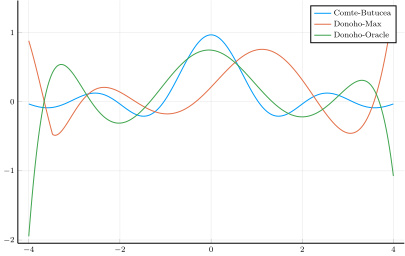

In [21]:
plot(marginal_grid, [butucea_t.Q.Q .+ butucea_t.Q.Qo  M_max_f.Q.Q.+M_max_f.Q.Qo Oracle_donoho_f.Q.Q .+ Oracle_donoho_f.Q.Qo],
     label=["Comte-Butucea" "Donoho-Max" "Donoho-Oracle"])

Let us just get point estimates based on these 3 affine estimators.. 

In [19]:
# truth
f_1 = posterior_stats(d_true, MarginalDensityTarget(1.0))
f_1

0.26898311885002113

In [9]:
srand(1)
Xs = rand(d_true, m); # draw from model

In [10]:
# Comte butucea
mean(BinnedCalibrator(marginal_grid, butucea_f).(Xs))

0.2701005474330966

In [11]:
# Donoho max
mean(M_max_f.Q.(Xs))

0.26994754761669226

In [12]:
# Donoho oracle
mean(Oracle_donoho_f.Q.(Xs))

0.26886482880531337

In [13]:
# finally let us check the CI

donoho_ci(Xs, Oracle_donoho_f, conf=0.9)[2:3]

(0.263037587030755, 0.2746920705798717)

### Quick coverage check:

Let us do the above a bit more systematically

In [14]:
srand(1)
nreps = 1000
est_butucea = Vector{Float64}(nreps)
est_donoho_max = Vector{Float64}(nreps)
est_donoho_oracle = Vector{Float64}(nreps)
coverage_donoho_max = Vector{Bool}(nreps)
width_donoho_max = Vector{Float64}(nreps)
coverage_donoho_oracle = Vector{Bool}(nreps)
width_donoho_oracle = Vector{Float64}(nreps)

for i=1:nreps
    Xs = rand(d_true, m); # draw from model
    est_butucea[i] = mean(BinnedCalibrator(marginal_grid, butucea_f).(Xs))
    donoho_max_ci = donoho_ci(Xs, M_max_f, conf=0.9)
    donoho_oracle_ci = donoho_ci(Xs, Oracle_donoho_f, conf=0.9)
    est_donoho_max[i] = donoho_max_ci[1]
    est_donoho_oracle[i] = donoho_oracle_ci[1]
    coverage_donoho_max[i] = (donoho_max_ci[2] <= f_1 <= donoho_max_ci[3])
    coverage_donoho_oracle[i] = (donoho_oracle_ci[2] <= f_1 <= donoho_oracle_ci[3])
    width_donoho_max[i] = donoho_max_ci[3] - donoho_max_ci[2]
    width_donoho_oracle[i] = donoho_oracle_ci[3] - donoho_oracle_ci[2]
end


Let us check coverage first and average width of CIs

In [15]:
mean(coverage_donoho_max), mean(coverage_donoho_oracle)

(0.919, 0.914)

In [16]:
mean(width_donoho_max), mean(width_donoho_oracle)

(0.012078548627166995, 0.011618154199734396)

Finally let us compare the estimators in terms of their MSE:

In [17]:
mean( (est_butucea - f_1).^2), mean( (est_donoho_max .- f_1).^2), mean( (est_donoho_oracle .- f_1).^2)

(3.6619604575095366e-5, 1.2433559528021454e-5, 1.1453915812007891e-5)

# Numerator of local false sign rate


Now let us do the same as above for the numerator of the local false sign rate.


In [10]:
target = LFSRNumerator(1.0)

EmpiricalBayes.LFSRNumerator(1.0)

In [11]:
butucea_num = EmpiricalBayes.comte_butucea.(marginal_grid, target, m);

We will have to plot our Minimax Calibrator in a separate plot:

In [13]:
M_max_num = MinimaxCalibrator(ds, f, m, target;
                tol=1e-4, ε=M_bd, C=Inf);

In [28]:
Oracle_donoho_num = MinimaxCalibrator(ds, f, m, target;
                C=2.0, tol=1e-4, ε=1e-3);

In [15]:
Oracle_donoho_num_001 = MinimaxCalibrator(ds, f, m, target;
                C=0.001, tol=1e-4, ε=1e-4);


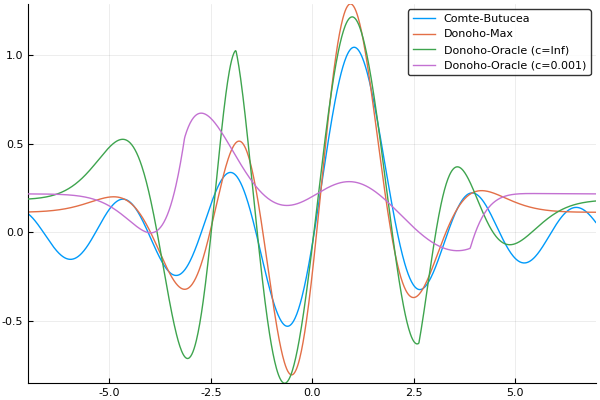

In [29]:
plot(marginal_grid,  [ butucea_num,
        M_max_num.Q.Q.+M_max_num.Q.Qo,
        Oracle_donoho_num.Q.Q.+Oracle_donoho_num.Q.Qo,
        Oracle_donoho_num_001.Q.Q.+Oracle_donoho_num_001.Q.Qo],
         label=["Comte-Butucea" "Donoho-Max" "Donoho-Oracle (c=Inf)" "Donoho-Oracle (c=0.001)"])

In [25]:
M_max_num.max_bias

0.00766300132408702

In [20]:
# truth:
num_true = posterior_stats(d_true, target)
num_true, num_true/f_1

(0.21858844367820998, 0.8126474427567699)

In [21]:
srand(1)
nreps = 1000
est_butucea = Vector{Float64}(nreps)
est_donoho_max = Vector{Float64}(nreps)
est_donoho_oracle = Vector{Float64}(nreps)
est_donoho_oracle2 = Vector{Float64}(nreps)
coverage_donoho_max = Vector{Bool}(nreps)
width_donoho_max = Vector{Float64}(nreps)
coverage_donoho_oracle = Vector{Bool}(nreps)
coverage_donoho_oracle2 = Vector{Bool}(nreps)
width_donoho_oracle = Vector{Float64}(nreps)
width_donoho_oracle2 = Vector{Float64}(nreps)

for i=1:nreps
    Xs = rand(d_true, m); # draw from model
    est_butucea[i] = mean(BinnedCalibrator(marginal_grid, butucea_num).(Xs))
    donoho_max_ci = donoho_ci(Xs, M_max_num, conf=0.9)
    
    donoho_oracle_ci = donoho_ci(Xs, Oracle_donoho_num, conf=0.9)
    donoho_oracle2_ci = donoho_ci(Xs, Oracle_donoho_num_001, conf=0.9)

    est_donoho_max[i] = donoho_max_ci[1]
    est_donoho_oracle[i] = donoho_oracle_ci[1]
    est_donoho_oracle2[i] = donoho_oracle2_ci[1]

    coverage_donoho_max[i] = (donoho_max_ci[2] <= num_true <= donoho_max_ci[3])
    coverage_donoho_oracle[i] = (donoho_oracle_ci[2] <= num_true <= donoho_oracle_ci[3])
    coverage_donoho_oracle2[i] = (donoho_oracle2_ci[2] <= num_true <= donoho_oracle2_ci[3])

    width_donoho_max[i] = donoho_max_ci[3] - donoho_max_ci[2]
    width_donoho_oracle[i] = donoho_oracle_ci[3] - donoho_oracle_ci[2]
    width_donoho_oracle2[i] = donoho_oracle2_ci[3] - donoho_oracle2_ci[2]
end

In [22]:
mean(coverage_donoho_max), mean(coverage_donoho_oracle), mean(coverage_donoho_oracle2)

(0.953, 0.939, 0.994)

In [23]:
mean(width_donoho_max), mean(width_donoho_oracle), mean(width_donoho_oracle2)

(0.032625003246690855, 0.029733340329611092, 0.007741404083659388)

As before, let us compare the MSEs:

In [24]:
mean( (est_butucea .- num_true).^2), mean( (est_donoho_max .- num_true).^2), 
mean( (est_donoho_oracle .- num_true).^2), mean( (est_donoho_oracle2 .- num_true).^2)

(5.4695154595492546e-5, 7.357171567767753e-5, 6.691541898121262e-5, 2.0232532053498074e-6)

Butucea one actually is almost unbiased but has huge variance

In [25]:
mean((est_butucea .- num_true)), std(est_butucea)

(0.005218393299857747, 0.005243187673588728)

## Worst case densities for the above cases:



In [32]:
g1_max = pdf(ds, M_max_num.π1, marginal_grid)
g2_max = pdf(ds, M_max_num.π2, marginal_grid)
g1_oracle = pdf(ds, Oracle_donoho_num.π1, marginal_grid)
g2_oracle = pdf(ds, Oracle_donoho_num.π2, marginal_grid)
g1_oracle2 = pdf(ds, Oracle_donoho_num_001.π1, marginal_grid)
g2_oracle2 = pdf(ds, Oracle_donoho_num_001.π2, marginal_grid);


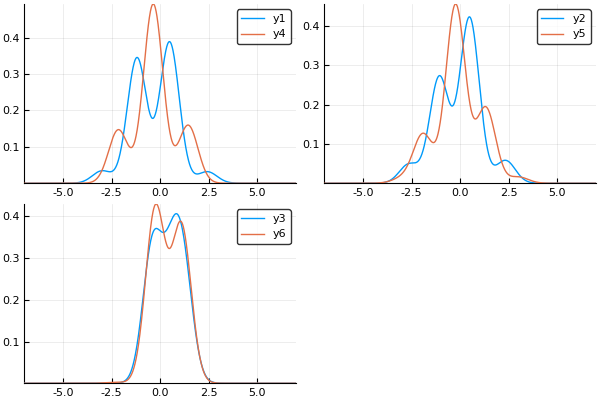

In [33]:
plot(marginal_grid, [g1_max g1_oracle g1_oracle2 g2_max g2_oracle g2_oracle2], layout=3)